In [7]:
import pygame
import random
import math

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [8]:
# Global Constants

WHITE = (255, 255, 255)
RED = (255, 0, 0)
LIGHT_BLUE = (173, 216, 230)
BLACK = (0, 0, 0)

In [4]:
# PyGame Implementation - Customizeable Animation

def animate_pi_approx(size=800, numPts=20000):
    
    pygame.init()

    screen = pygame.display.set_mode((size, size))
    pygame.display.set_caption("Approximating Π")
    
    font = pygame.font.Font(None, 25)

    pts = []
    total = 0
    inside = 0
    final = 0

    on = True
    while on:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:  # Close the window manually
                on = False

        if len(pts) > numPts:
            final = (inside/total) * 4
            on = False

        rX, rY = random.uniform(0.0, float(size)), random.uniform(0.0, float(size))
        pts.append((rX, rY))
        total += 1
        assert(total == len(pts))

        if (math.dist((rX, rY), (size/2, size/2)) < size/2):
            inside += 1

        # Draw
        screen.fill(LIGHT_BLUE)
        pygame.draw.circle(screen, WHITE, (size/2, size/2), size/2)

        for pt in pts:
            rX, rY = pt
            pygame.draw.circle(screen, RED, (rX, rY), 2)

        piApproximation = font.render("Π Approximation: "+str((inside/total)*4), True, BLACK)
        screen.blit(piApproximation, (10, 10))

        pointCount = font.render("Number of Points: "+str(len(pts)), True, BLACK)
        screen.blit(pointCount, (10, 30))

        final = (inside/total)*4

        pygame.display.flip()

        # Limit frames per second
        pygame.time.Clock().tick(500)

    # Quit pygame
    pygame.quit()

    return "Size: " + str(size) + ", Number of Points: " + str(numPts) + ", Result: " + str(final)

#animate_pi_approx(400, 5000)
animate_pi_approx(800, 20000)

'Size: 800, Number of Points: 20000, Result: 3.1476852314768524'

In [9]:
# Matplot Implementation

def approx_pi_visual(size=500, numPts=10000):
    
    plt.figure(figsize=(6, 6))
    
    plt.xlim(0, size)
    plt.ylim(0, size)
    plt.gca().set_aspect('equal')  # square aspect ratio
    
    crad = size / 2
    ccenter = (size/2, size/2)
    circle = Circle(ccenter, crad, edgecolor='black', facecolor='none', linewidth=2)
    plt.gca().add_patch(circle)
    
    #pts = [0]*numPts
    inside = 0
    
    for _ in range(numPts):
        rX, rY = random.uniform(0.0, float(size)), random.uniform(0.0, float(size))
        #pts[i] = (rX, rY)
        
        dist = math.dist((rX, rY), ccenter)
        if dist <= crad:
            col = 'red'
            inside += 1
        else:
            col = 'blue'
        plt.scatter(rX, rY, color=col, s=10)
    
    plt.title("MC Simulation for Approximating Π")
    plt.show()
    
    return (inside/numPts)*4

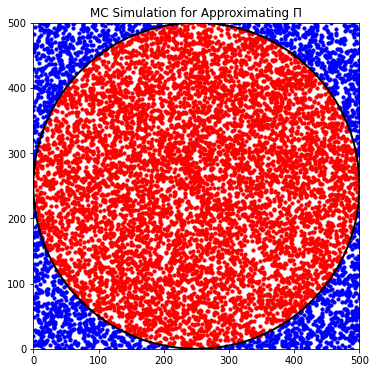

3.1356

In [10]:
approx_pi_visual()

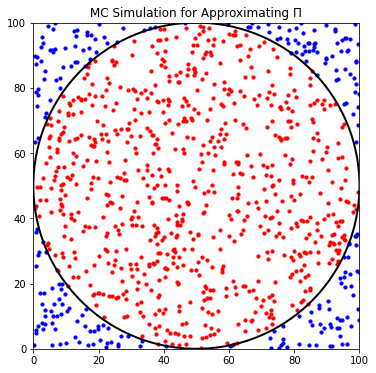

3.016

In [11]:
approx_pi_visual(100, 1000)